In [5]:
#import all module 


import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
import seaborn as sns
import pandas as pd
import numpy as np

In [6]:
#load datasets iris.150 x 5

dataset = sns.load_dataset("iris")

/Users/gorasiyarahulrameshbhai/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


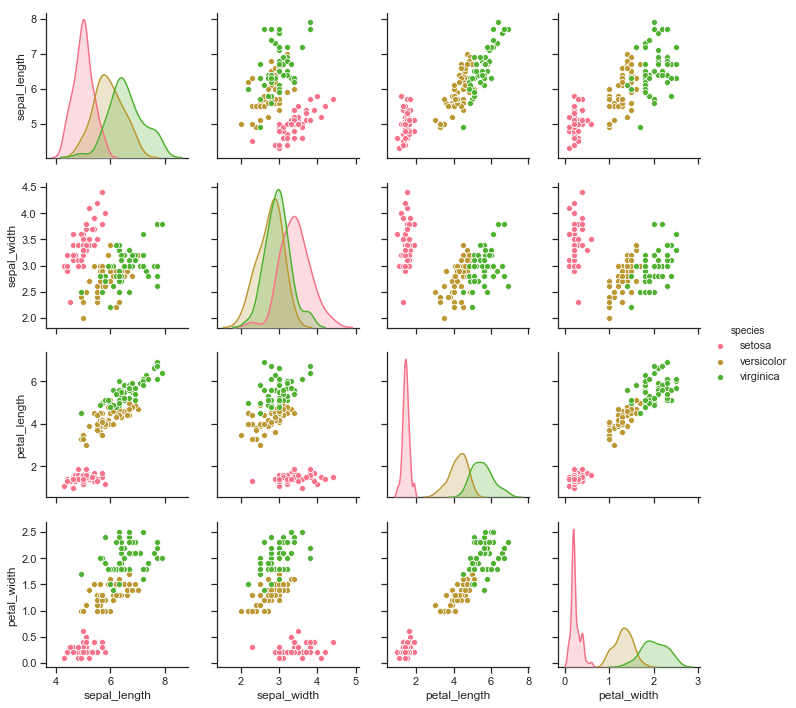

In [7]:
#present all combinational graph that we classify

sns.set(style="ticks")
sns.set_palette("husl")
sns.pairplot(dataset.iloc[:,0:6], hue="species")

In [8]:
#Splitting the data into training and test

X = dataset.iloc[:,0:4].values
y = dataset.iloc[:,4].values

In [9]:
#using labelencoder encod label setosa,verginica or ..

from sklearn.preprocessing import LabelEncoder
encoder =  LabelEncoder()
y1 = encoder.fit_transform(y)

In [10]:
#set binary value of this label

Y = pd.get_dummies(y1).values

#split data into test and train sets.by 80%=train set or 20%=test sets
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [11]:
#create sequential model

model = Sequential()

#add weight of hidden layer 
model.add(Dense(4,input_shape=(4,),activation='relu'))

#add weight of output layer

model.add(Dense(3,activation='softmax'))

#set learning rate 
model.compile(Adam(lr=0.04),'categorical_crossentropy',metrics=['accuracy'])

model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 15        
Total params: 35
Trainable params: 35
Non-trainable params: 0
_________________________________________________________________


In [12]:
#train model using keras

model.fit(X_train,y_train,epochs=100)

Instructions for updating:
Use tf.cast instead.
Epoch 1/100
120/120 [==============================] - 0s 3ms/step - loss: 2.0960 - acc: 0.3250
Epoch 2/100
120/120 [==============================] - 0s 97us/step - loss: 1.1284 - acc: 0.4167
Epoch 3/100
120/120 [==============================] - 0s 79us/step - loss: 0.8432 - acc: 0.7250
Epoch 4/100
120/120 [==============================] - 0s 84us/step - loss: 0.7186 - acc: 0.7167
Epoch 5/100
120/120 [==============================] - 0s 113us/step - loss: 0.6477 - acc: 0.6917
Epoch 6/100
120/120 [==============================] - 0s 93us/step - loss: 0.6074 - acc: 0.6917
Epoch 7/100
120/120 [==============================] - 0s 96us/step - loss: 0.5820 - acc: 0.6917
Epoch 8/100
120/120 [==============================] - 0s 90us/step - loss: 0.5630 - acc: 0.6917
Epoch 9/100
120/120 [==============================] - 0s 102us/step - loss: 0.5490 - acc: 0.7000
Epoch 10/100
120/120 [==============================] - 0s 88us/step - loss: 0

120/120 [==============================] - 0s 80us/step - loss: 0.1084 - acc: 0.9667
Epoch 82/100
120/120 [==============================] - 0s 90us/step - loss: 0.1224 - acc: 0.9583
Epoch 83/100
120/120 [==============================] - 0s 105us/step - loss: 0.1276 - acc: 0.9583
Epoch 84/100
120/120 [==============================] - 0s 91us/step - loss: 0.1109 - acc: 0.9750
Epoch 85/100
120/120 [==============================] - 0s 93us/step - loss: 0.1124 - acc: 0.9667
Epoch 86/100
120/120 [==============================] - 0s 83us/step - loss: 0.1019 - acc: 0.9750
Epoch 87/100
120/120 [==============================] - 0s 111us/step - loss: 0.1018 - acc: 0.9667
Epoch 88/100
120/120 [==============================] - 0s 81us/step - loss: 0.1104 - acc: 0.9667
Epoch 89/100
120/120 [==============================] - 0s 80us/step - loss: 0.0986 - acc: 0.9833
Epoch 90/100
120/120 [==============================] - 0s 79us/step - loss: 0.0996 - acc: 0.9833
Epoch 91/100
120/120 [=========

In [13]:
#predict model test set.

y_pred = model.predict(X_test)

In [14]:
y_pred

array([[1.0906843e-04, 4.7979180e-02, 9.5191175e-01],
       [4.2734195e-02, 9.5715719e-01, 1.0865722e-04],
       [9.9914348e-01, 8.5645291e-04, 1.2037574e-25],
       [1.0906843e-04, 4.7979180e-02, 9.5191175e-01],
       [9.9281186e-01, 7.1880957e-03, 5.7705194e-21],
       [1.0906843e-04, 4.7979180e-02, 9.5191175e-01],
       [9.9502462e-01, 4.9753389e-03, 8.9064300e-22],
       [3.0134590e-02, 9.6938789e-01, 4.7749464e-04],
       [2.1336159e-02, 9.7665352e-01, 2.0102861e-03],
       [6.2816411e-02, 9.3716311e-01, 2.0487576e-05],
       [1.0906843e-04, 4.7979180e-02, 9.5191175e-01],
       [3.7687127e-02, 9.6212721e-01, 1.8565464e-04],
       [1.7809257e-02, 9.7797990e-01, 4.2107501e-03],
       [1.8176759e-02, 9.7794777e-01, 3.8754733e-03],
       [1.3145480e-02, 9.7281533e-01, 1.4039126e-02],
       [9.9623859e-01, 3.7613984e-03, 2.1558834e-22],
       [1.4348639e-02, 9.7566140e-01, 9.9898754e-03],
       [1.1725954e-02, 9.6666592e-01, 2.1608159e-02],
       [9.8238176e-01, 1.761

In [15]:
y_test

array([[0, 0, 1],
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0]], dtype=uint8)

In [17]:
#convert into numpy array for sklearn classification report to get f1 score
y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

In [18]:
#Accuracy of the predicted values

from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

   micro avg       1.00      1.00      1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
